In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [10]:
data = r"C:\Personal\Python Practice\Zomatodataset\zomato.csv"
df = pd.read_csv(data,encoding = "latin 1")

In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [15]:
df.info()   # Object Dtype is string datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [19]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## In Data Analysis What we will do
1) Missing Values
2) Explore about the Numerical Variables
3) Explore about the categorical Variables
4) Finding relationships between Features

In [21]:
# To check the number of missing values in the columns
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [23]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [24]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [56]:
# Country and their count of records
Country_values = df["Country Code"].value_counts().reset_index()

In [73]:
city = Country_values["Country Code"].values
city_values = Country_values["count"].values

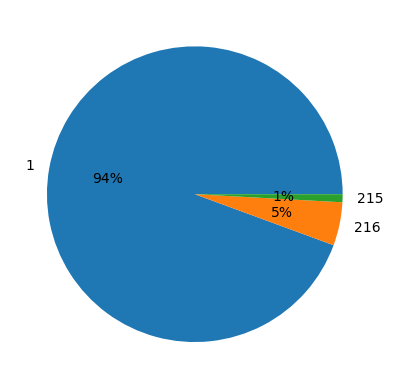

In [83]:
plt.pie(city_values[:3],labels = city[:3],autopct="%1.f%%")
plt.show()

Observation : Zomato maximum transactions are from 1 country code, after that 216 and 3rd is 215.

In [86]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [96]:
ratings = df.groupby(["Aggregate rating","Rating color", "Rating text"]).size().reset_index().rename(columns= {0:"count"})
ratings.head()

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


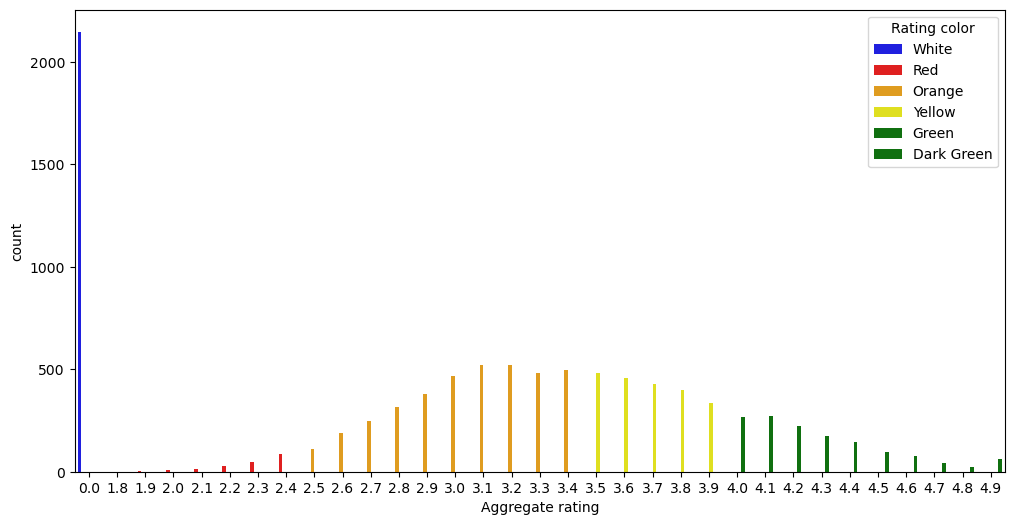

In [114]:
plt.figure(figsize=(12,6))
sns.barplot(x = "Aggregate rating",y = "count",data = ratings,hue = "Rating color",palette = ["blue","red","orange","yellow","green","green"])
plt.show()

## Observations
1) Not rated Color is very high
2) Maximum number of rating are between 2.5 to 3.4

In [137]:
## Find the countries name with 0 ratings
df[df["Rating color"] == "White"].groupby("Country Code").size().reset_index().rename(columns={0:"Count"})

,Country Code,Count
0,1,2139
1,30,5
2,215,1
3,216,3


In [148]:
## Find out which currency is used by which country
df.groupby(["Country Code","Currency"]).size().reset_index()

,Country Code,Currency,0
0,1,Indian Rupees(Rs.),8652
1,14,Dollar($),24
2,30,Brazilian Real(R$),60
3,37,Dollar($),4
4,94,Indonesian Rupiah(IDR),21
5,148,NewZealand($),40
6,162,Botswana Pula(P),22
7,166,Qatari Rial(QR),20
8,184,Dollar($),20
9,189,Rand(R),60


In [159]:
## Which countries do have online deliveries
df[df["Has Online delivery"] == "Yes"].groupby(["Country Code"]).size().reset_index().rename(columns= {0:"count"})

,Country Code,count
0,1,2423
1,214,28


#### Online deliveries are only available in 2 countries

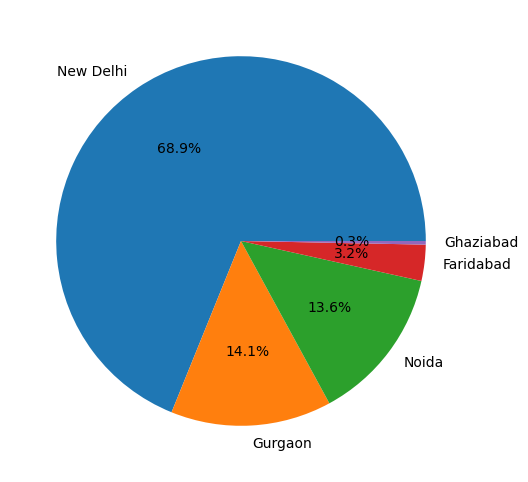

In [164]:
# City and their count of records
City_values = df["City"].value_counts().reset_index()
city = City_values["City"].values
city_values = City_values["count"].values
plt.pie(city_values[:5],labels = city[:5],autopct="%1.1f%%")
plt.show()

In [178]:
## Top 10 Cuisines
df.groupby(["Cuisines"]).size().reset_index().rename(columns = {0:"Count"}).sort_values("Count",ascending = False)[:10]

,Cuisines,Count
1306,North Indian,936
1329,"North Indian, Chinese",511
497,Chinese,354
828,Fast Food,354
1514,"North Indian, Mughlai",334
331,Cafe,299
177,Bakery,218
1520,"North Indian, Mughlai, Chinese",197
186,"Bakery, Desserts",170
1749,Street Food,149
